## JUDUL DATASET: Telco Customer Churn TIPE MASALAH: Duit Bocor (Cost/Risk) 🔴

1. Masalah Bisnisnya Apa? Perusahaan kehilangan pendapatan rutin (Monthly Revenue) karena banyak pelanggan yang memutuskan berhenti berlangganan.

2. Siapa yang Diteliti? (Entitas) Pelanggan perorangan. (1 baris data = 1 Orang Customer).

3. Targetnya Mana? (Output / Y) Kolom Churn (Yes/No).
- Yes = Masalah (Kabur).
- No = Aman (Setia).

4. Variabel Penyebab / Tersangka Utama (Input / X) Kita menduga pelanggan kabur karena faktor-faktor ini (Hipotesis Awal):

- Masalah Uang: Kolom MonthlyCharges (Kemahalan?) atau PaymentMethod (Ribet bayarnya?).
- Masalah Komitmen: Kolom Contract (Apakah yang kontrak bulanan lebih gampang kabur dibanding kontrak tahunan?).
- Masalah Layanan: Kolom TechSupport (Apakah support-nya jelek?) atau InternetService (Sinyal jelek?).
- Profil Orang: Kolom SeniorCitizen atau Dependents (Faktor demografi).

5. Gol-nya Apa? (Action) Menemukan pola dari variabel penyebab di atas (misal: "Oh, ternyata yang kabur itu rata-rata yang bayar mahal & gapunya Tech Support"), lalu memberikan rekomendasi ke Marketing untuk kasih diskon/service khusus ke kelompok tersebut.

----
## 2. Data Understanding
(Coding load data & cek info)

In [1]:
import pandas as pd 

churn_df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
# Cek apakah ada data ganda?
churn_df.duplicated().sum()

np.int64(0)

---
## 3. Data Cleaning
(Coding hapus duplikat & missing value)

## 4. Exploratory Data Analysis (EDA)
(Coding bikin grafik Churn vs Harga, Churn vs Kontrak)

In [7]:
# Cek Tersangka 3: Internet Service
print(churn_df.groupby('InternetService')['Churn'].value_counts())

# Cek Tersangka 4: Payment Method
print(churn_df.groupby('PaymentMethod')['Churn'].value_counts())

InternetService  Churn
DSL              No       1962
                 Yes       459
Fiber optic      No       1799
                 Yes      1297
No               No       1413
                 Yes       113
Name: count, dtype: int64
PaymentMethod              Churn
Bank transfer (automatic)  No       1286
                           Yes       258
Credit card (automatic)    No       1290
                           Yes       232
Electronic check           No       1294
                           Yes      1071
Mailed check               No       1304
                           Yes       308
Name: count, dtype: int64


In [4]:
# Hitung perbandingan yang kabur vs setia
print(churn_df['Churn'].value_counts())

print('=' * 40)

# Kelompokkan berdasarkan Kontrak, lalu hitung Churn-nya (misalkan kita curiga Contract memengaruhi Churn)
churn_based_contract = churn_df.groupby('Contract')['Churn'].value_counts()
print(churn_based_contract)

Churn
No     5174
Yes    1869
Name: count, dtype: int64
Contract        Churn
Month-to-month  No       2220
                Yes      1655
One year        No       1307
                Yes       166
Two year        No       1647
                Yes        48
Name: count, dtype: int64


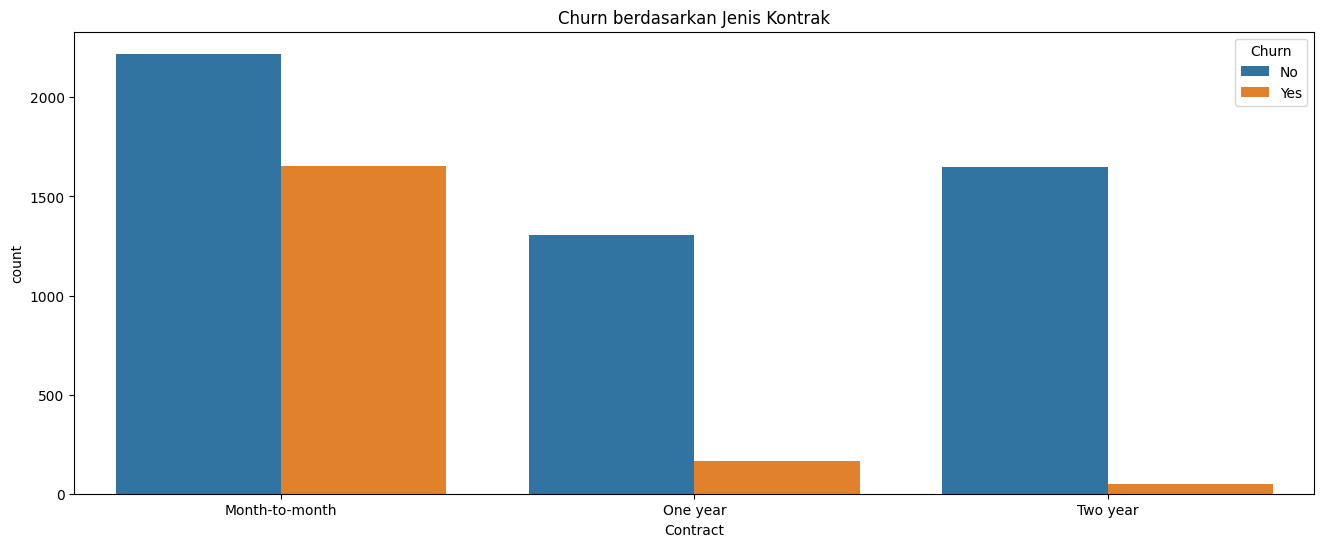

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuktikan Hubungan Churn dengan Kontrak
plt.figure(figsize=(16,6))
sns.countplot(data=churn_df, x='Contract', hue='Churn')
plt.title('Churn berdasarkan Jenis Kontrak')
plt.show()

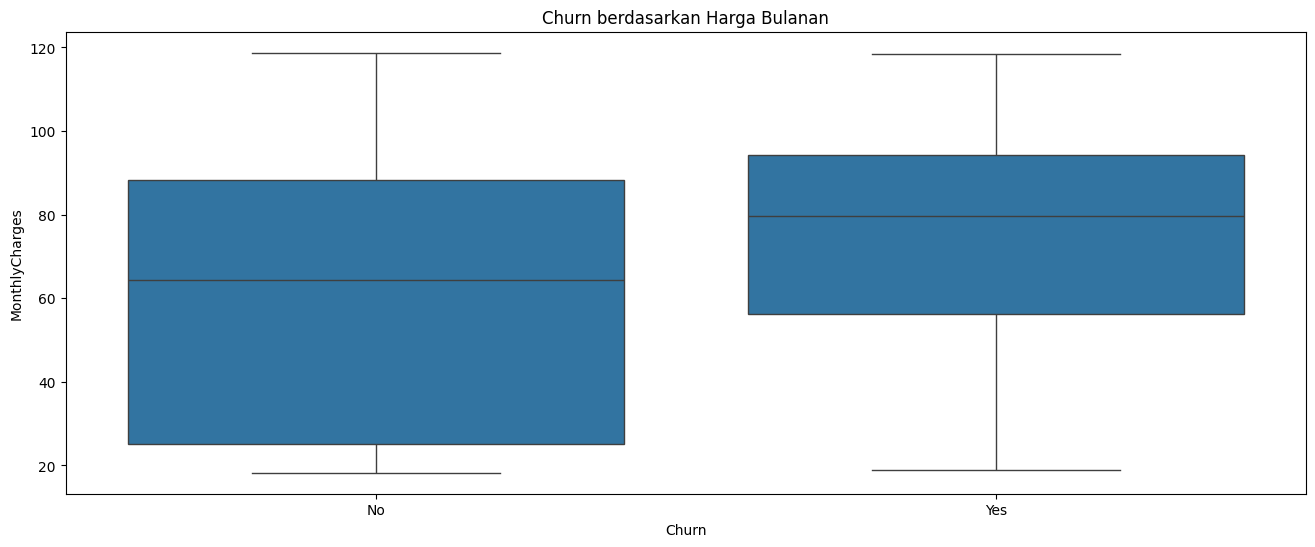

In [6]:
# Membuktikan Hubungan Churn dengan Harga Bulanan
plt.figure(figsize=(16,6))
sns.boxplot(data=churn_df, x='Churn', y='MonthlyCharges')
plt.title('Churn berdasarkan Harga Bulanan')
plt.show()

## 5. Kesimpulan & Rekomendasi

**Temuan Utama (Insight):**
1.  **Faktor Kontrak:** Pelanggan dengan kontrak bulanan (Month-to-month) memiliki tingkat Churn yang sangat mengkhawatirkan dibandingkan kontrak tahunan.
2.  **Faktor Harga:** Pelanggan yang Churn rata-rata memiliki tagihan bulanan (Monthly Charges) yang lebih tinggi. Ini mengindikasikan sensitivitas harga.

**Rekomendasi Bisnis (Action Plan):**
1.  **Promo Migrasi:** Tim Marketing harus segera membuat kampanye "Diskon 20%" khusus untuk pelanggan Month-to-month jika mereka mau pindah ke Kontrak 1 Tahun. Ini akan "mengunci" mereka agar tidak mudah kabur.
2.  **Review Harga Premium:** Cek pelanggan dengan tagihan tinggi (>80). Tawarkan benefit tambahan (misal: gratis speed upgrade) agar mereka merasa *worth it* bayar mahal.